In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset

df = pd.read_csv('flight_data_2024.csv')
df

,year,month,day_of_month,day_of_week,fl_date,origin,origin_city_name,origin_state_nm,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,cancelled,air_time,distance,weather_delay,late_aircraft_delay
0,2024,1,1,1,1/1/2024,JFK,"New York, NY",New York,1247.0,31.0,1318.0,1442.0,7.0,0,84.0,509,0,0
1,2024,1,1,1,1/1/2024,MSP,"Minneapolis, MN",Minnesota,1001.0,20.0,1021.0,1249.0,6.0,0,88.0,622,0,0
2,2024,1,1,1,1/1/2024,JFK,"New York, NY",New York,1411.0,21.0,1432.0,1533.0,8.0,0,61.0,288,0,0
3,2024,1,1,1,1/1/2024,RIC,"Richmond, VA",Virginia,1643.0,13.0,1656.0,1747.0,12.0,0,51.0,288,0,0
4,2024,1,1,1,1/1/2024,DTW,"Detroit, MI",Michigan,1010.0,21.0,1031.0,1016.0,4.0,0,45.0,237,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2024,2,29,4,2/29/2024,SJU,"San Juan, PR",Puerto Rico,1447.0,24.0,1511.0,1640.0,7.0,0,149.0,1045,0,0
1048571,2024,2,29,4,2/29/2024,PHX,"Phoenix, AZ",Arizona,59.0,12.0,111.0,647.0,3.0,0,216.0,1972,0,105
1048572,2024,2,29,4,2/29/2024,JAX,"Jacksonville, FL",Florida,2014.0,20.0,2034.0,2128.0,10.0,0,54.0,328,0,0
1048573,2024,2,29,4,2/29/2024,CLT,"Charlotte, NC",North Carolina,1104.0,12.0,1116.0,1210.0,7.0,0,114.0,808,0,70


In [3]:
# exploring dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   year                 1048575 non-null  int64  
 1   month                1048575 non-null  int64  
 2   day_of_month         1048575 non-null  int64  
 3   day_of_week          1048575 non-null  int64  
 4   fl_date              1048575 non-null  object 
 5   origin               1048575 non-null  object 
 6   origin_city_name     1048575 non-null  object 
 7   origin_state_nm      1048575 non-null  object 
 8   dep_time             1026022 non-null  float64
 9   taxi_out             1025450 non-null  float64
 10  wheels_off           1025450 non-null  float64
 11  wheels_on            1024898 non-null  float64
 12  taxi_in              1024898 non-null  float64
 13  cancelled            1048575 non-null  int64  
 14  air_time             1022824 non-null  float64
 15

In [4]:
# exploring dataset

df.shape, df.columns.tolist()

((1048575, 18),
 ['year',
  'month',
  'day_of_month',
  'day_of_week',
  'fl_date',
  'origin',
  'origin_city_name',
  'origin_state_nm',
  'dep_time',
  'taxi_out',
  'wheels_off',
  'wheels_on',
  'taxi_in',
  'cancelled',
  'air_time',
  'distance',
  'weather_delay',
  'late_aircraft_delay'])

In [5]:
# missing values per column in %

missing_pct = df.isna().mean().sort_values(ascending=False).mul(100).round(2)
missing_pct.to_frame('missing_%')

,missing_%
air_time,2.46
wheels_on,2.26
taxi_in,2.26
taxi_out,2.21
wheels_off,2.21
dep_time,2.15
month,0.00
year,0.00
day_of_month,0.00
day_of_week,0.00


In [6]:
# missing values per column by cancelled (true or false)

na_by_cancel = df.groupby('cancelled')[['dep_time','taxi_out','wheels_off','wheels_on','taxi_in','air_time']].apply(lambda x: x.isna().mean()).T
na_by_cancel

cancelled,0,1
dep_time,0.000000,0.967691
taxi_out,0.000000,0.992234
wheels_off,0.000000,0.992234
wheels_on,0.000362,1.000000
taxi_in,0.000362,1.000000
air_time,0.002385,1.000000


In [7]:
# convert to datetime

df['fl_date'] = pd.to_datetime(df['fl_date'], errors='coerce')

# add readable names for month and weekday

df['month_name'] = df['month'].map({
    1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
    7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'
})

df['dow_name'] = df['day_of_week'].map({
    1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'
})

df[['fl_date','month_name','dow_name']].head(-20)

# we can see that the data covers only 2 full months(January and February)

,fl_date,month_name,dow_name
0,2024-01-01,Jan,Mon
1,2024-01-01,Jan,Mon
2,2024-01-01,Jan,Mon
3,2024-01-01,Jan,Mon
4,2024-01-01,Jan,Mon
...,...,...,...
1048550,2024-02-29,Feb,Thu
1048551,2024-02-29,Feb,Thu
1048552,2024-02-29,Feb,Thu
1048553,2024-02-29,Feb,Thu


In [ ]:
# converting HHMM float to minutes since midnight for consistent temporal analysis and ML readiness 
# applying temporal sanity checks to exclude non-existent times
# example: 945 → 585 minutes (9:45 AM)
# example: 25:67 time is impossible  →  NaN

def hhmm_to_minutes(x):

    if pd.isna(x):
        return np.nan
    
    x = int(x)

    hh, mm = divmod(x, 100)

    if hh < 0 or hh > 24 or mm < 0 or mm >= 60:
        return np.nan
    
    return hh * 60 + mm

for col in ['dep_time', 'wheels_off', 'wheels_on']:
    df[col + '_min'] = df[col].apply(hhmm_to_minutes).astype('float32')

df[['dep_time', 'dep_time_min', 'wheels_off_min', 'wheels_on_min']]

,dep_time,dep_time_min,wheels_off_min,wheels_on_min
0,1247.0,767.0,798.0,882.0
1,1001.0,601.0,621.0,769.0
2,1411.0,851.0,872.0,933.0
3,1643.0,1003.0,1016.0,1067.0
4,1010.0,610.0,631.0,616.0
...,...,...,...,...
1048570,1447.0,887.0,911.0,1000.0
1048571,59.0,59.0,71.0,407.0
1048572,2014.0,1214.0,1234.0,1288.0
1048573,1104.0,664.0,676.0,730.0


In [9]:
# cancellation rate by month

by_month = (
    df.groupby('month_name')['cancelled']
      .mean()
      .reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
)

# cancellation rate by day of week

by_dow = (
    df.groupby('dow_name')['cancelled']
      .mean()
      .reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
)

print("Cancel rate by month (%):")
print((by_month * 100).round(2))

print("\nCancel rate by day of week (%):")
print((by_dow * 100).round(2))

Cancel rate by month (%):
month_name
Jan    3.73
Feb    0.58
Mar     NaN
Apr     NaN
May     NaN
Jun     NaN
Jul     NaN
Aug     NaN
Sep     NaN
Oct     NaN
Nov     NaN
Dec     NaN
Name: cancelled, dtype: float64

Cancel rate by day of week (%):
dow_name
Mon    2.95
Tue    3.37
Wed    1.49
Thu    1.41
Fri    2.36
Sat    1.81
Sun    2.02
Name: cancelled, dtype: float64


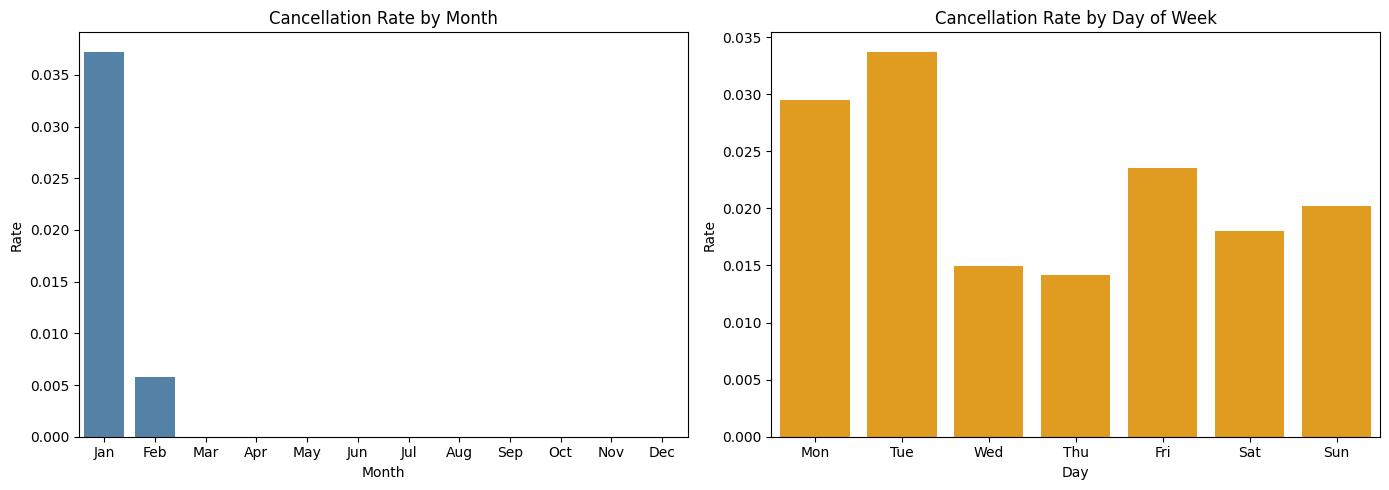

In [10]:
# flight cancellation trends by months and day of week

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.barplot(x=by_month.index, y=by_month.values, color='steelblue')
plt.title('Cancellation Rate by Month')
plt.ylabel('Rate')
plt.xlabel('Month')
plt.xticks

plt.subplot(1,2,2)
sns.barplot(x=by_dow.index, y=by_dow.values, color='orange')
plt.title('Cancellation Rate by Day of Week')
plt.ylabel('Rate')
plt.xlabel('Day')

plt.tight_layout()
plt.show()

Share of total delay minutes:
weather_delay          18.3
late_aircraft_delay    81.7
dtype: float64


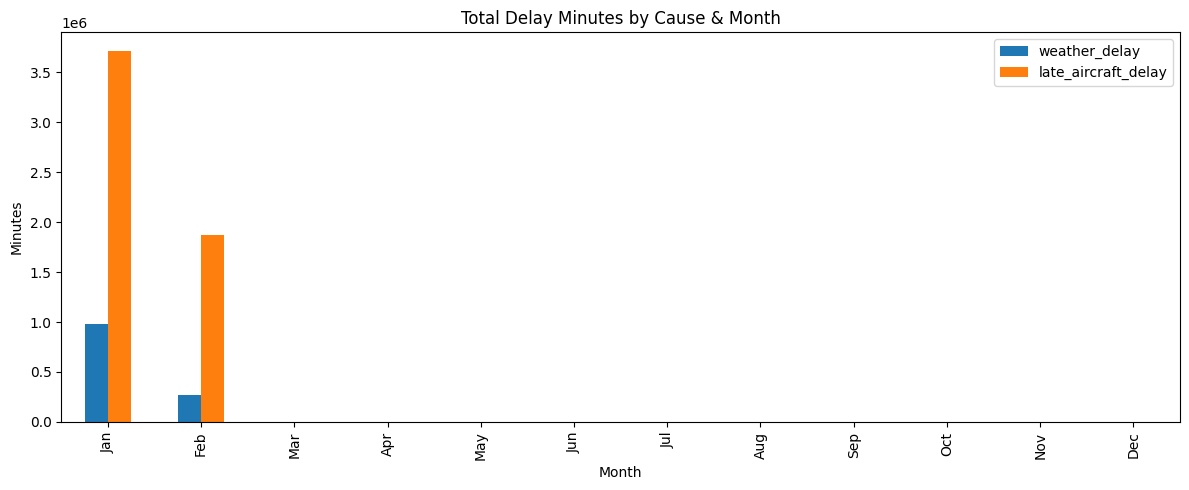

In [11]:
# comparing weather and late-aircraft delays

delay_totals = df[['weather_delay','late_aircraft_delay']].sum()
delay_share = (delay_totals / delay_totals.sum() * 100).round(1)

print("Share of total delay minutes:")
print(delay_share)

monthly_delays = (
    df.groupby('month_name')[['weather_delay','late_aircraft_delay']]
      .sum()
      .reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
)

monthly_delays.plot(kind='bar', figsize=(12,5))
plt.title('Total Delay Minutes by Cause & Month')
plt.ylabel('Minutes')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

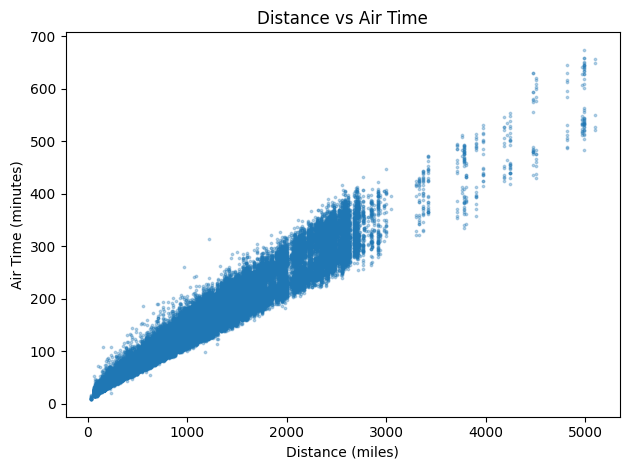

In [12]:
# distance and air time correlation

ops = df.query('cancelled == 0').copy()

clean = ops[(ops['air_time'] > 0) & (ops['distance'] > 0)].copy()
clean = clean.sample(min(len(clean), 150_000), random_state=7)

plt.scatter(clean['distance'], clean['air_time'], s=3, alpha=0.3)
plt.title('Distance vs Air Time')
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (minutes)')
plt.tight_layout()
plt.show()

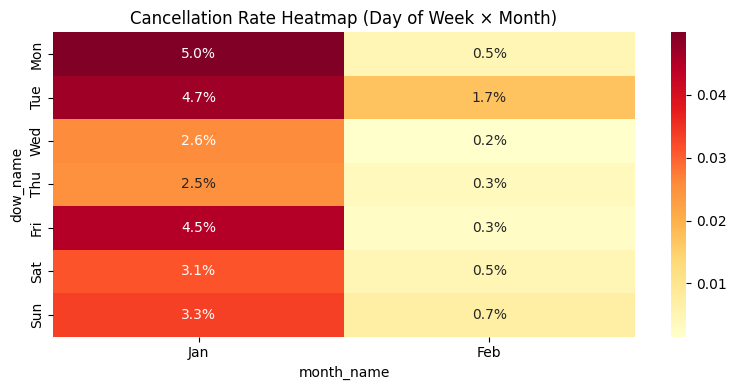

In [13]:
# cancellation rate heatmap by day of week, month

pivot = df.pivot_table(
    index='dow_name',
    columns='month_name',
    values='cancelled',
    aggfunc='mean'
)

month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dow_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

available_months = [m for m in month_order if m in pivot.columns]
available_days = [d for d in dow_order if d in pivot.index]

pivot = pivot.loc[available_days, available_months]

plt.figure(figsize=(8,4))
sns.heatmap(pivot, annot=True, fmt='.1%', cmap='YlOrRd', cbar=True)
plt.title('Cancellation Rate Heatmap (Day of Week × Month)')
plt.tight_layout()
plt.show()

*January–February 2024 Dataset Overview*

## Key Metrics
- **Total Flights**: 1,048,575
- **Overall Cancellation Rate**: 2.22%

## Temporal Patterns
### Monthly Trends
- **January**: higher cancellation rate  
- **February**: lower cancellation rate

### Weekly Patterns  
- **Tuesday**: peak cancellation day

## Delay Analysis
### Primary Delay Causes
- **Late Aircraft**: 81.7% of total delay minutes  
- **Weather**: 18.3% of total delay minutes

### Weather Impact
- Significant spike in January  
- Potential cause: seasonal winter storms

In [14]:
# feature engineering for ML task #2

In [15]:
# filter only completed flights (cancelled = 0)

df = df[df['cancelled'] == 0]

In [16]:
# Check for missing values in completed flights

print("\nMissing values in completed flights:")
for col in ['dep_time_min', 'taxi_out', 'air_time', 'taxi_in', 'weather_delay', 'late_aircraft_delay']:
    if col in df.columns:
        missing = df[col].isna().sum()
        print(f"{col:20}: {missing} missing ({missing/len(df)*100:.1f}%)")


Missing values in completed flights:
dep_time_min        : 0 missing (0.0%)
taxi_out            : 0 missing (0.0%)
air_time            : 2445 missing (0.2%)
taxi_in             : 371 missing (0.0%)
weather_delay       : 0 missing (0.0%)
late_aircraft_delay : 0 missing (0.0%)


In [ ]:
# create target variable - actual arrival time (only for completed flights)

# creating target variable

df['total_delay'] = df['weather_delay'] + df['late_aircraft_delay']
df['actual_arrival_min'] = df['wheels_off_min'] + df['air_time'] + df['taxi_in'] + df['total_delay']

# average delays by origin (only from completed flights)

origin_delays = df.groupby('origin')['total_delay'].mean()
df['origin_avg_delay'] = df['origin'].map(origin_delays)

# average delays by month

month_delays = df.groupby('month')['total_delay'].mean()
df['monthly_avg_delay'] = df['month'].map(month_delays)

# average delays by day of week

dow_delays = df.groupby('day_of_week')['total_delay'].mean()
df['dow_avg_delay'] = df['day_of_week'].map(dow_delays)

# average delays by hour of day

df['dep_hour'] = (df['dep_time_min'] // 60).astype(int)
hour_delays = df.groupby('dep_hour')['total_delay'].mean()

df['hourly_avg_delay'] = df['dep_hour'].map(hour_delays)

In [18]:
# all columns after feature engineering

df.columns.tolist()

['year',
 'month',
 'day_of_month',
 'day_of_week',
 'fl_date',
 'origin',
 'origin_city_name',
 'origin_state_nm',
 'dep_time',
 'taxi_out',
 'wheels_off',
 'wheels_on',
 'taxi_in',
 'cancelled',
 'air_time',
 'distance',
 'weather_delay',
 'late_aircraft_delay',
 'month_name',
 'dow_name',
 'dep_time_min',
 'wheels_off_min',
 'wheels_on_min',
 'total_delay',
 'actual_arrival_min',
 'origin_avg_delay',
 'monthly_avg_delay',
 'dow_avg_delay',
 'dep_hour',
 'hourly_avg_delay']

In [19]:
# save processed data

df.to_csv('flight_data_processed.csv', index=False)
print("Data saved as 'flight_data_processed.csv'")

Data saved as 'flight_data_processed.csv'
